# Ejercicio 9 — Filtro Visual (Convoluciones Personalizadas)
Este ejercicio implementa una **convolución 2D manual** y la compara con la función `cv2.filter2D` de OpenCV.

Se diseñan tres kernels:
- **Sharpen (Afilado):** resalta los bordes y detalles.
- **Blur (Desenfoque):** suaviza la imagen reduciendo ruido.
- **Edge Detection (Detección de bordes):** resalta los contornos de los objetos.

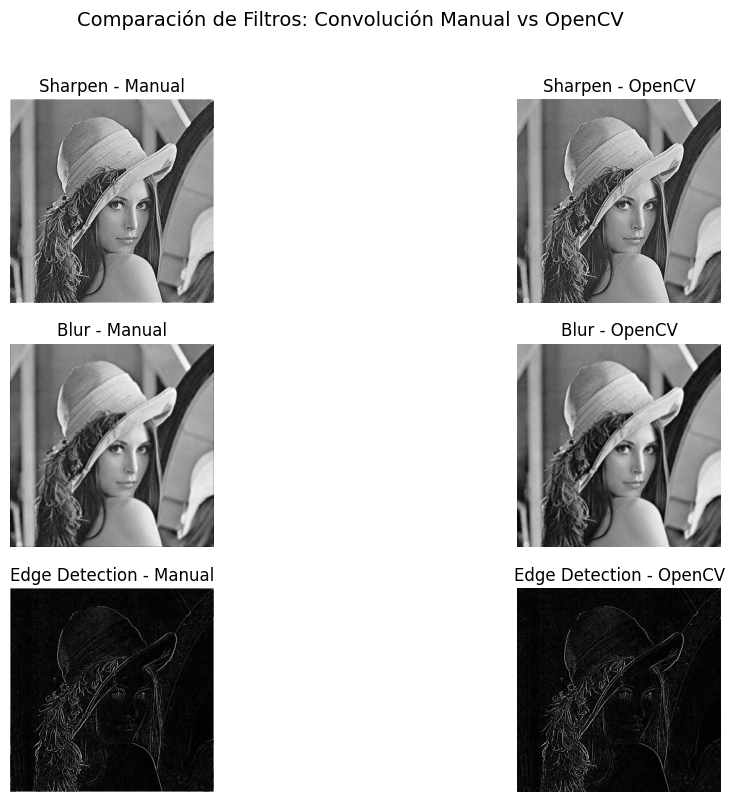

In [5]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Descargar imagen desde una URL (nuevo enlace sin restricciones)
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
resp = urllib.request.urlopen(req)
img_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

# Convertir a escala de grises
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Función de convolución manual
def manual_convolution(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(image, dtype=float)
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return np.clip(output, 0, 255).astype(np.uint8)

# Definir kernels
kernels = {
    "Sharpen": np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    "Blur": np.ones((3, 3), np.float32) / 9,
    "Edge Detection": np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
}

# Aplicar filtros y comparar
results = {}
for name, k in kernels.items():
    manual = manual_convolution(img_gray, k)
    opencv = cv2.filter2D(img_gray, -1, k)
    results[name] = (manual, opencv)

# Mostrar resultados
plt.figure(figsize=(12, 9))
i = 1
for name, (manual, opencv) in results.items():
    plt.subplot(3, 2, i); plt.imshow(manual, cmap='gray'); plt.title(f'{name} - Manual'); plt.axis('off')
    plt.subplot(3, 2, i+1); plt.imshow(opencv, cmap='gray'); plt.title(f'{name} - OpenCV'); plt.axis('off')
    i += 2
plt.suptitle('Comparación de Filtros: Convolución Manual vs OpenCV', fontsize=14)
plt.show()
